In [6]:
from Data import *
from Evaluation import * 
from MF import *
from GMF import *
from MLP import *
from NeuMF import *
import matplotlib.pyplot as plt

**First step of data preparation**

In [7]:
movieLens_train_dict= df_to_dict(movieLens_train_rating_data)
movieLens_test_dict= df_to_dict(movieLens_test_rating_data)
pinterest_train_dict= df_to_dict(pinterest_train_rating_data)
pinterest_test_dict= df_to_dict(pinterest_test_rating_data)

**Building the training and testing sets for the experiments 1 and 2**

In [8]:
movieLens_x_train, movieLens_y_train= getTrainSet(movieLens_train_dict, movieLens_test_dict, numItems= movieLens_num_items)
movieLens_x_test, _= getEvaluationSet(movieLens_train_dict, movieLens_test_dict, numItems= movieLens_num_items)
pinterest_x_train, pinterest_y_train= getTrainSet(pinterest_train_dict, pinterest_test_dict, numItems= pinterest_num_items)
pinterest_x_test, _= getEvaluationSet(pinterest_train_dict, pinterest_test_dict, numItems= pinterest_num_items)

**I. Evaluation of the Top K recommended items where K ranges from 1 to 10**

In [9]:
# 1. Build, train and predict using the different models. 
movieLensMF = MF(movieLens_num_users, movieLens_num_items)
movieLensMLP = MLP(movieLens_num_users, movieLens_num_items)
movieLensGMF = GMF(movieLens_num_users, movieLens_num_items)
movieLensNeuMF = NeuMF(movieLens_num_users, movieLens_num_items)

batch_size= 1024*8
epochs= 10

print('movieLens MF fitting')
movieLensMF_history = movieLensMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True) 
print('movieLens MLP fitting')
movieLensMLP_history = movieLensMLP.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print('movieLens GMF fitting')
movieLensGMF_history = movieLensGMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print('movieLens NeuMF fitting')
movieLensNeuMF_history = movieLensNeuMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print("movieLens predictions")
movieLensMF_predictions= movieLensMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 
movieLensMLP_predictions= movieLensMLP.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1)
movieLensGMF_predictions= movieLensGMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 
movieLensNeuMF_predictions= movieLensNeuMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 

pinterestMF = MF(pinterest_num_users, pinterest_num_items)
pinterestMLP = MLP(pinterest_num_users, pinterest_num_items)
pinterestGMF = GMF(pinterest_num_users, pinterest_num_items)
pinterestNeuMF = NeuMF(pinterest_num_users, pinterest_num_items)
print('pinterest MF fitting')
pinterestMF_history = pinterestMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print('pinterest MLP fitting')
pinterestMLP_history = pinterestMLP.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print('pinterest GMF fitting')
pinterestGMF_history = pinterestGMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print('pinterest NeuMF fitting')
pinterestNeuMF_history = pinterestNeuMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, verbose=1, shuffle=True)
print("pinterest predictions")
pinterestMF_predictions= pinterestMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
pinterestMLP_predictions= pinterestMLP.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
pinterestGMF_predictions= pinterestGMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
pinterestNeuMF_predictions= pinterestNeuMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 

movieLens MF fitting
Epoch 1/10
607/607 [==============================] - 3s 4ms/step - loss: 1.4568
Epoch 2/10
607/607 [==============================] - 2s 4ms/step - loss: 0.6520
Epoch 3/10
607/607 [==============================] - 2s 4ms/step - loss: 0.5185
Epoch 4/10
607/607 [==============================] - 2s 4ms/step - loss: 0.4623
Epoch 5/10
607/607 [==============================] - 2s 4ms/step - loss: 0.4275
Epoch 6/10
607/607 [==============================] - 2s 4ms/step - loss: 0.4041
Epoch 7/10
607/607 [==============================] - 2s 4ms/step - loss: 0.3868
Epoch 8/10
607/607 [==============================] - 2s 4ms/step - loss: 0.3731
Epoch 9/10
607/607 [==============================] - 2s 4ms/step - loss: 0.3608
Epoch 10/10
607/607 [==============================] - 2s 4ms/step - loss: 0.3490
movieLens MLP fitting
Epoch 1/10
607/607 [==============================] - 3s 3ms/step - loss: 0.3670
Epoch 2/10
607/607 [==============================] - 2s 3ms/step

In [10]:
# 2. Compute HR@k & NDCG@k for different values of k
# 1 st column for HR and the second for NDCG
Ks= np.arange(1, 11) 
n= Ks.shape[0]
movieLensMF_HR_I, movieLensMLP_HR_I, movieLensGMF_HR_I, movieLensNeuMF_HR_I= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
movieLensMF_NDCG_I, movieLensMLP_NDCG_I, movieLensGMF_NDCG_I, movieLensNeuMF_NDCG_I= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
pinterestMF_HR_I, pinterestMLP_HR_I, pinterestGMF_HR_I, pinterestNeuMF_HR_I= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
pinterestMF_NDCG_I, pinterestMLP_NDCG_I, pinterestGMF_NDCG_I, pinterestNeuMF_NDCG_I= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

for k in Ks:
    print("iteration {} is running".format(k))
    movieLensMF_HR_I[k-1], movieLensMF_NDCG_I[k-1]= evalModel(movieLensMF_predictions, movieLens_num_users, K= k) 
    movieLensMLP_HR_I[k-1], movieLensMLP_NDCG_I[k-1]= evalModel(movieLensMLP_predictions, movieLens_num_users, K= k) 
    movieLensGMF_HR_I[k-1], movieLensGMF_NDCG_I[k-1]= evalModel(movieLensGMF_predictions, movieLens_num_users, K= k) 
    movieLensNeuMF_HR_I[k-1], movieLensNeuMF_NDCG_I[k-1]= evalModel(movieLensNeuMF_predictions, movieLens_num_users, K= k) 

    pinterestMF_HR_I[k-1], pinterestMF_NDCG_I[k-1]= evalModel(pinterestMF_predictions, pinterest_num_users, K= k) 
    pinterestMLP_HR_I[k-1], pinterestMLP_NDCG_I[k-1]= evalModel(pinterestMLP_predictions, pinterest_num_users, K= k) 
    pinterestGMF_HR_I[k-1], pinterestGMF_NDCG_I[k-1]= evalModel(pinterestGMF_predictions, pinterest_num_users, K= k) 
    pinterestNeuMF_HR_I[k-1], pinterestNeuMF_NDCG_I[k-1]= evalModel(pinterestNeuMF_predictions, pinterest_num_users, K= k) 

np.savez('movieLens_HR_I.npz', arr1= movieLensMF_HR_I, arr2=movieLensMLP_HR_I, arr3=movieLensGMF_HR_I, arr4=movieLensNeuMF_HR_I)
np.savez('movieLens_NDCG_I.npz', arr1= movieLensMF_NDCG_I, arr2=movieLensMLP_NDCG_I, arr3=movieLensGMF_NDCG_I, arr4=movieLensNeuMF_NDCG_I)
np.savez('pinterest_HR_I.npz', arr1= pinterestMF_HR_I, arr2= pinterestMLP_HR_I, arr3= pinterestGMF_HR_I, arr4= pinterestNeuMF_HR_I)
np.savez('pinterest_NDCG_I.npz', arr1= pinterestMF_NDCG_I, arr2= pinterestMLP_NDCG_I, arr3= pinterestGMF_NDCG_I, arr4= pinterestNeuMF_NDCG_I)

iteration 1 is running
iteration 2 is running
iteration 3 is running
iteration 4 is running
iteration 5 is running
iteration 6 is running
iteration 7 is running
iteration 8 is running
iteration 9 is running
iteration 10 is running


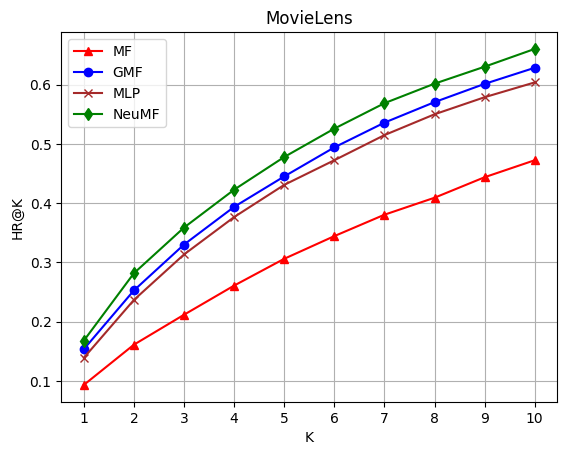

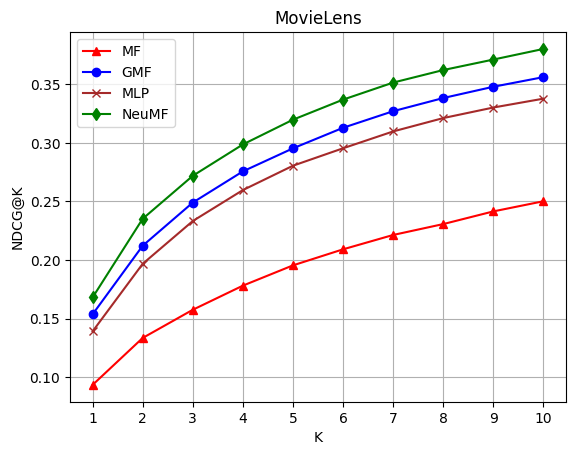

In [11]:
plt.figure("K for ML with HR")
plt.plot(Ks, movieLensMF_HR_I, color= 'red', marker="^")
plt.plot(Ks, movieLensGMF_HR_I, color='blue', marker="o")
plt.plot(Ks, movieLensMLP_HR_I, color= 'brown', marker="x")
plt.plot(Ks, movieLensNeuMF_HR_I, color= 'green', marker="d")
plt.xlabel("K")
plt.ylabel("HR@K")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("MovieLens")
plt.xticks(Ks)
plt.grid()
plt.savefig("MF_HR_K.png")

plt.figure("K for ML with NDCG")
plt.plot(Ks, movieLensMF_NDCG_I, color= 'red', marker="^")
plt.plot(Ks, movieLensGMF_NDCG_I, color='blue', marker="o")
plt.plot(Ks, movieLensMLP_NDCG_I, color= 'brown', marker="x")
plt.plot(Ks, movieLensNeuMF_NDCG_I, color= 'green', marker="d")
plt.xlabel("K")
plt.ylabel("NDCG@K")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("MovieLens")
plt.xticks(Ks)
plt.grid()
plt.savefig("MF_NDCG_K.png")

plt.show()

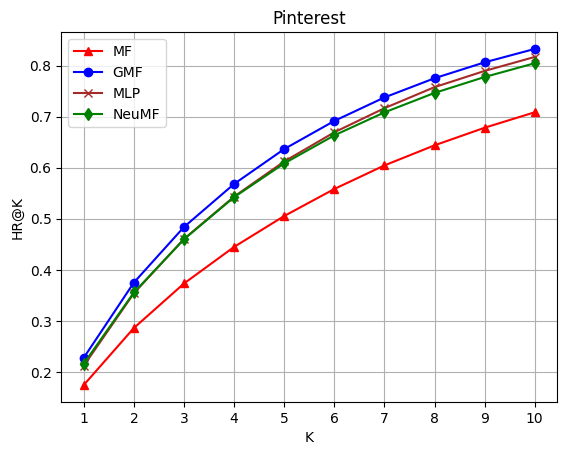

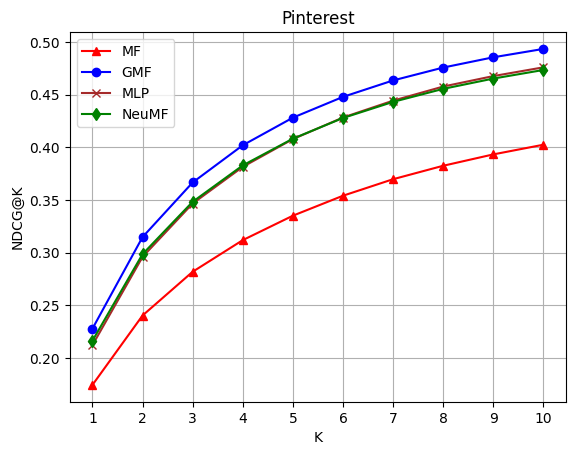

In [12]:
plt.figure("K for ML with HR")
plt.plot(Ks, pinterestMF_HR_I, color= 'red', marker="^")
plt.plot(Ks, pinterestGMF_HR_I, color='blue', marker="o")
plt.plot(Ks, pinterestMLP_HR_I, color= 'brown', marker="x")
plt.plot(Ks, pinterestNeuMF_HR_I, color= 'green', marker="d")
plt.xlabel("K")
plt.ylabel("HR@K")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("Pinterest")
plt.xticks(Ks)
plt.grid()
plt.savefig("pin_HR_K.png")

plt.figure("K for ML with NDCG")
plt.plot(Ks, pinterestMF_NDCG_I, color= 'red', marker="^")
plt.plot(Ks, pinterestGMF_NDCG_I, color='blue', marker="o")
plt.plot(Ks, pinterestMLP_NDCG_I, color= 'brown', marker="x")
plt.plot(Ks, pinterestNeuMF_NDCG_I, color= 'green', marker="d")
plt.xlabel("K")
plt.ylabel("NDCG@K")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("Pinterest")
plt.xticks(Ks)
plt.grid()
plt.savefig("pin_NDCG_K.png")

plt.show()

**II. Evaluation of HR@10 & NDCG@10 for different numbers of predictive factors**

In [13]:
factorsList= np.array([8, 16, 32, 64])

n= factorsList.shape[0]
movieLensMF_HR_II, movieLensMLP_HR_II, movieLensGMF_HR_II, movieLensNeuMF_HR_II= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
movieLensMF_NDCG_II, movieLensMLP_NDCG_II, movieLensGMF_NDCG_II, movieLensNeuMF_NDCG_II= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
pinterestMF_HR_II, pinterestMLP_HR_II, pinterestGMF_HR_II, pinterestNeuMF_HR_II= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
pinterestMF_NDCG_II, pinterestMLP_NDCG_II, pinterestGMF_NDCG_II, pinterestNeuMF_NDCG_II= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

batch_size= 1024*10
epochs= 10

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta= 1e-2, patience= 3)

k= 0
for factors in factorsList:
    k+= 1
    print("iteration {} is running".format(k))

    if (k==1):
        # it is the same case as the last experiment for k=10
        movieLensMF_HR_II[k-1], movieLensMF_NDCG_II[k-1]= movieLensMF_HR_I[-1], movieLensMF_NDCG_I[-1] 
        movieLensMLP_HR_II[k-1], movieLensMLP_NDCG_II[k-1]= movieLensMLP_HR_I[-1], movieLensMLP_NDCG_I[-1] 
        movieLensGMF_HR_II[k-1], movieLensGMF_NDCG_II[k-1]= movieLensGMF_HR_I[-1], movieLensGMF_NDCG_I[-1]
        movieLensNeuMF_HR_II[k-1], movieLensNeuMF_NDCG_II[k-1]= movieLensNeuMF_HR_I[-1], movieLensNeuMF_NDCG_I[-1] 

        pinterestMF_HR_II[k-1], pinterestMF_NDCG_II[k-1]= pinterestMF_HR_I[-1], pinterestMF_NDCG_I[-1]
        pinterestMLP_HR_II[k-1], pinterestMLP_NDCG_II[k-1]= pinterestMLP_HR_I[-1], pinterestMLP_NDCG_I[-1] 
        pinterestGMF_HR_II[k-1], pinterestGMF_NDCG_II[k-1]= pinterestGMF_HR_I[-1], pinterestGMF_NDCG_I[-1]
        pinterestNeuMF_HR_II[k-1], pinterestNeuMF_NDCG_II[k-1]= pinterestNeuMF_HR_I[-1], pinterestNeuMF_NDCG_I[-1]
    else:   
        batch_size= batch_size*4
        # 1. Build, train and predict using the different models for the given number of factors 
        movieLensMF = MF(movieLens_num_users, movieLens_num_items, factors= factors)
        movieLensMLP = MLP(movieLens_num_users, movieLens_num_items, factors= factors)
        movieLensGMF = GMF(movieLens_num_users, movieLens_num_items, factors= factors)
        movieLensNeuMF = NeuMF(movieLens_num_users, movieLens_num_items, factors= factors)

        print('movieLens MF fitting for iteration {}'.format(k))
        movieLensMF_history = movieLensMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True) 
        print('movieLens MLP fitting for iteration {}'.format(k))
        movieLensMLP_history = movieLensMLP.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('movieLens GMF fitting for iteration {}'.format(k))
        movieLensGMF_history = movieLensGMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('movieLens NeuMF fitting for iteration {}'.format(k))
        movieLensNeuMF_history = movieLensNeuMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('movieLens predictions for iteration {}'.format(k))
        movieLensMF_predictions= movieLensMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 
        movieLensMLP_predictions= movieLensMLP.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1)
        movieLensGMF_predictions= movieLensGMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 
        movieLensNeuMF_predictions= movieLensNeuMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 

        pinterestMF = MF(pinterest_num_users, pinterest_num_items, factors= factors)
        pinterestMLP = MLP(pinterest_num_users, pinterest_num_items, factors= factors)
        pinterestGMF = GMF(pinterest_num_users, pinterest_num_items, factors= factors)
        pinterestNeuMF = NeuMF(pinterest_num_users, pinterest_num_items, factors= factors)

        print('pinterest MF fitting for iteration {}'.format(k))
        pinterestMF_history = pinterestMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest MLP fitting for iteration {}'.format(k))
        pinterestMLP_history = pinterestMLP.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest GMF fitting for iteration {}'.format(k))
        pinterestGMF_history = pinterestGMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest NeuMF fitting for iteration {}'.format(k))
        pinterestNeuMF_history = pinterestNeuMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest predictions for iteration {}'.format(k))
        pinterestMF_predictions= pinterestMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
        pinterestMLP_predictions= pinterestMLP.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
        pinterestGMF_predictions= pinterestGMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
        pinterestNeuMF_predictions= pinterestNeuMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 

        # 2. Compute HR@10 & NDCG@10 for different factors
        movieLensMF_HR_II[k-1], movieLensMF_NDCG_II[k-1]= evalModel(movieLensMF_predictions, movieLens_num_users) 
        movieLensMLP_HR_II[k-1], movieLensMLP_NDCG_II[k-1]= evalModel(movieLensMLP_predictions, movieLens_num_users) 
        movieLensGMF_HR_II[k-1], movieLensGMF_NDCG_II[k-1]= evalModel(movieLensGMF_predictions, movieLens_num_users) 
        movieLensNeuMF_HR_II[k-1], movieLensNeuMF_NDCG_II[k-1]= evalModel(movieLensNeuMF_predictions, movieLens_num_users) 

        pinterestMF_HR_II[k-1], pinterestMF_NDCG_II[k-1]= evalModel(pinterestMF_predictions, pinterest_num_users) 
        pinterestMLP_HR_II[k-1], pinterestMLP_NDCG_II[k-1]= evalModel(pinterestMLP_predictions, pinterest_num_users) 
        pinterestGMF_HR_II[k-1], pinterestGMF_NDCG_II[k-1]= evalModel(pinterestGMF_predictions, pinterest_num_users) 
        pinterestNeuMF_HR_II[k-1], pinterestNeuMF_NDCG_II[k-1]= evalModel(pinterestNeuMF_predictions, pinterest_num_users) 

np.savez('movieLens_HR_II.npz', arr1= movieLensMF_HR_II, arr2=movieLensMLP_HR_II, arr3=movieLensGMF_HR_II, arr4=movieLensNeuMF_HR_II)
np.savez('movieLens_NDCG_II.npz', arr1= movieLensMF_NDCG_II, arr2=movieLensMLP_NDCG_II, arr3=movieLensGMF_NDCG_II, arr4=movieLensNeuMF_NDCG_II)
np.savez('pinterest_HR_II.npz', arr1= pinterestMF_HR_II, arr2= pinterestMLP_HR_II, arr3= pinterestGMF_HR_II, arr4= pinterestNeuMF_HR_II)
np.savez('pinterest_NDCG_II.npz', arr1= pinterestMF_NDCG_II, arr2= pinterestMLP_NDCG_II, arr3= pinterestGMF_NDCG_II, arr4= pinterestNeuMF_NDCG_II)

iteration 1 is running
iteration 2 is running
movieLens MF fitting for iteration 2
Epoch 1/10
122/122 [==============================] - 2s 11ms/step - loss: 1.7111
Epoch 2/10
122/122 [==============================] - 1s 10ms/step - loss: 0.7902
Epoch 3/10
122/122 [==============================] - 1s 9ms/step - loss: 0.5873
Epoch 4/10
122/122 [==============================] - 1s 10ms/step - loss: 0.5247
Epoch 5/10
122/122 [==============================] - 1s 10ms/step - loss: 0.4906
Epoch 6/10
122/122 [==============================] - 1s 10ms/step - loss: 0.4670
Epoch 7/10
122/122 [==============================] - 1s 9ms/step - loss: 0.4492
Epoch 8/10
122/122 [==============================] - 1s 10ms/step - loss: 0.4349
Epoch 9/10
122/122 [==============================] - 1s 9ms/step - loss: 0.4231
Epoch 10/10
122/122 [==============================] - 1s 9ms/step - loss: 0.4131
movieLens MLP fitting for iteration 2
Epoch 1/10
122/122 [==============================] - 4s 29ms/

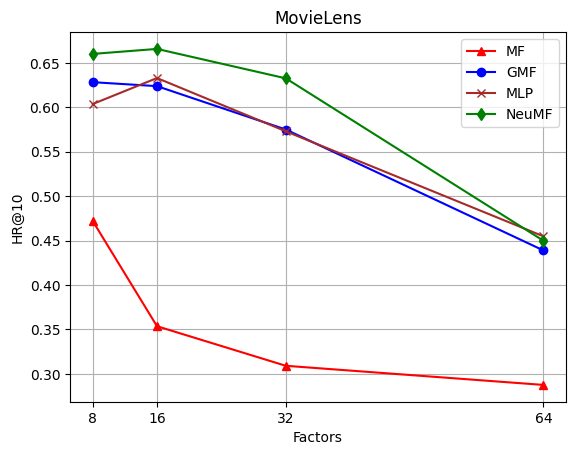

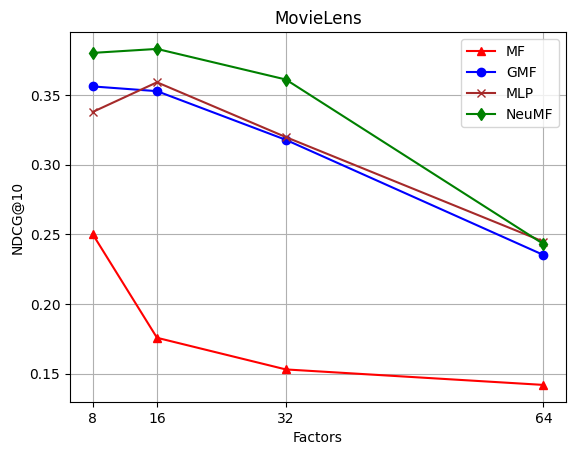

In [14]:
plt.figure("Factors for ML with HR")
plt.plot(factorsList, movieLensMF_HR_II, color= 'red', marker="^")
plt.plot(factorsList, movieLensGMF_HR_II, color='blue', marker="o")
plt.plot(factorsList, movieLensMLP_HR_II, color= 'brown', marker="x")
plt.plot(factorsList, movieLensNeuMF_HR_II, color= 'green', marker="d")
plt.xlabel("Factors")
plt.ylabel("HR@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("MovieLens")
plt.xticks(factorsList)
plt.grid()
#plt.savefig("MF_NDCG_factor.png")

plt.figure("K for ML with NDCG")
plt.plot(factorsList, movieLensMF_NDCG_II, color= 'red', marker="^")
plt.plot(factorsList, movieLensGMF_NDCG_II, color='blue', marker="o")
plt.plot(factorsList, movieLensMLP_NDCG_II, color= 'brown', marker="x")
plt.plot(factorsList, movieLensNeuMF_NDCG_II, color= 'green', marker="d")
plt.xlabel("Factors")
plt.ylabel("NDCG@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("MovieLens")
plt.xticks(factorsList)
plt.grid()
#plt.savefig("MF_NDCG_factor.png")

plt.show()

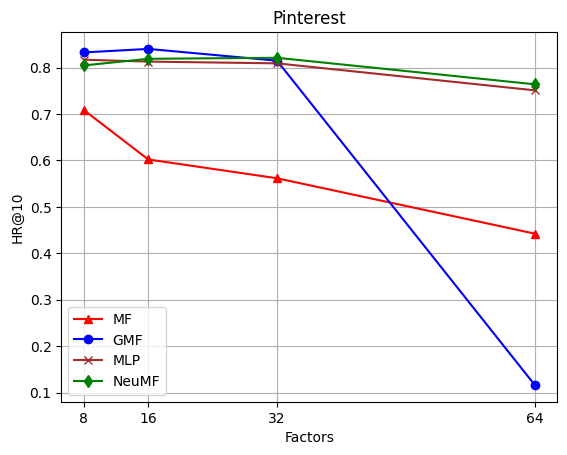

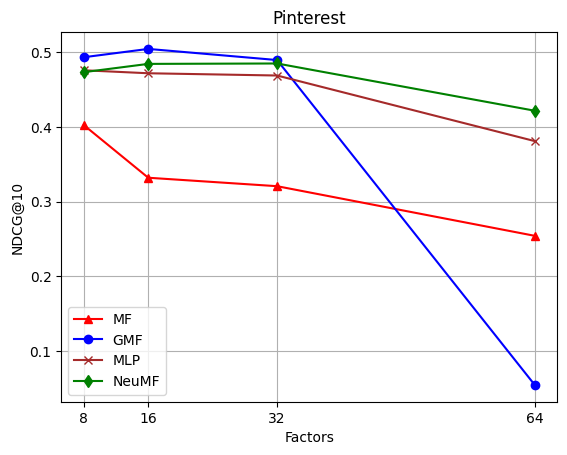

In [15]:
plt.figure("Factors for ML with HR")
plt.plot(factorsList, pinterestMF_HR_II, color= 'red', marker="^")
plt.plot(factorsList, pinterestGMF_HR_II, color='blue', marker="o")
plt.plot(factorsList, pinterestMLP_HR_II, color= 'brown', marker="x")
plt.plot(factorsList, pinterestNeuMF_HR_II, color= 'green', marker="d")
plt.xlabel("Factors")
plt.ylabel("HR@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("Pinterest")
plt.xticks(factorsList)
plt.grid()
#plt.savefig("pin_HR_factor.png")

plt.figure("Factors for ML with NDCG")
plt.plot(factorsList, pinterestMF_NDCG_II, color= 'red', marker="^")
plt.plot(factorsList, pinterestGMF_NDCG_II, color='blue', marker="o")
plt.plot(factorsList, pinterestMLP_NDCG_II, color= 'brown', marker="x")
plt.plot(factorsList, pinterestNeuMF_NDCG_II, color= 'green', marker="d")
plt.xlabel("Factors")
plt.ylabel("NDCG@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("Pinterest")
plt.xticks(factorsList)
plt.grid()
#plt.savefig("pin_NDCG_factor.png")

plt.show()

**III. Evaluation of HR@10 & NDCG@10 for different numbers of negative instances**

In [17]:
negatives= np.arange(1, 11)

n= negatives.shape[0]
movieLensMF_HR_III, movieLensMLP_HR_III, movieLensGMF_HR_III, movieLensNeuMF_HR_III= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
movieLensMF_NDCG_III, movieLensMLP_NDCG_III, movieLensGMF_NDCG_III, movieLensNeuMF_NDCG_III= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
pinterestMF_HR_III, pinterestMLP_HR_III, pinterestGMF_HR_III, pinterestNeuMF_HR_III= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
pinterestMF_NDCG_III, pinterestMLP_NDCG_III, pinterestGMF_NDCG_III, pinterestNeuMF_NDCG_III= np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

batch_size= 1024*8
epochs= 10

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta= 1e-2, patience= 3)

k= 0
for negativeInstances in negatives:
    k+= 1
    print("iteration {} is running".format(k))

    if(negativeInstances==4):
        # it is the same case as the first experiment for k=10
        movieLensMF_HR_III[k-1], movieLensMF_NDCG_III[k-1]= movieLensMF_HR_I[-1], movieLensMF_NDCG_I[-1] 
        movieLensMLP_HR_III[k-1], movieLensMLP_NDCG_III[k-1]= movieLensMLP_HR_I[-1], movieLensMLP_NDCG_I[-1] 
        movieLensGMF_HR_III[k-1], movieLensGMF_NDCG_III[k-1]= movieLensGMF_HR_I[-1], movieLensGMF_NDCG_I[-1]
        movieLensNeuMF_HR_III[k-1], movieLensNeuMF_NDCG_III[k-1]= movieLensNeuMF_HR_I[-1], movieLensNeuMF_NDCG_I[-1] 

        pinterestMF_HR_III[k-1], pinterestMF_NDCG_III[k-1]= pinterestMF_HR_I[-1], pinterestMF_NDCG_I[-1]
        pinterestMLP_HR_III[k-1], pinterestMLP_NDCG_III[k-1]= pinterestMLP_HR_I[-1], pinterestMLP_NDCG_I[-1] 
        pinterestGMF_HR_III[k-1], pinterestGMF_NDCG_III[k-1]= pinterestGMF_HR_I[-1], pinterestGMF_NDCG_I[-1]
        pinterestNeuMF_HR_III[k-1], pinterestNeuMF_NDCG_III[k-1]= pinterestNeuMF_HR_I[-1], pinterestNeuMF_NDCG_I[-1]
    else:
        # 1. Generate training data for different numbers of negative instances
        movieLens_x_train, movieLens_y_train= getTrainSet(movieLens_train_dict, movieLens_test_dict, numItems= movieLens_num_items, numNegatives= negativeInstances)
        pinterest_x_train, pinterest_y_train= getTrainSet(pinterest_train_dict, pinterest_test_dict, numItems= pinterest_num_items, numNegatives= negativeInstances)

        # 2. Build, train and predict using the generated training data and the same testing data as previously 
        movieLensMF = MF(movieLens_num_users, movieLens_num_items)
        movieLensMLP = MLP(movieLens_num_users, movieLens_num_items)
        movieLensGMF = GMF(movieLens_num_users, movieLens_num_items)
        movieLensNeuMF = NeuMF(movieLens_num_users, movieLens_num_items)

        print('movieLens MF fitting for iteration {}'.format(k))
        movieLensMF_history = movieLensMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True) 
        print('movieLens MLP fitting for iteration {}'.format(k))
        movieLensMLP_history = movieLensMLP.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('movieLens GMF fitting for iteration {}'.format(k))
        movieLensGMF_history = movieLensGMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('movieLens NeuMF fitting for iteration {}'.format(k))
        movieLensNeuMF_history = movieLensNeuMF.model.fit(movieLens_x_train, movieLens_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('movieLens predictions for iteration {}'.format(k))
        movieLensMF_predictions= movieLensMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 
        movieLensMLP_predictions= movieLensMLP.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1)
        movieLensGMF_predictions= movieLensGMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 
        movieLensNeuMF_predictions= movieLensNeuMF.model.predict(movieLens_x_test, batch_size= batch_size, verbose=1) 

        pinterestMF = MF(pinterest_num_users, pinterest_num_items)
        pinterestMLP = MLP(pinterest_num_users, pinterest_num_items)
        pinterestGMF = GMF(pinterest_num_users, pinterest_num_items)
        pinterestNeuMF = NeuMF(pinterest_num_users, pinterest_num_items)

        print('pinterest MF fitting for iteration {}'.format(k))
        pinterestMF_history = pinterestMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest MLP fitting for iteration {}'.format(k))
        pinterestMLP_history = pinterestMLP.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest GMF fitting for iteration {}'.format(k))
        pinterestGMF_history = pinterestGMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest NeuMF fitting for iteration {}'.format(k))
        pinterestNeuMF_history = pinterestNeuMF.model.fit(pinterest_x_train, pinterest_y_train, batch_size= batch_size, epochs= epochs, callbacks=[callback], verbose=1, shuffle=True)
        print('pinterest predictions for iteration {}'.format(k))
        pinterestMF_predictions= pinterestMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
        pinterestMLP_predictions= pinterestMLP.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
        pinterestGMF_predictions= pinterestGMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 
        pinterestNeuMF_predictions= pinterestNeuMF.model.predict(pinterest_x_test, batch_size= batch_size, verbose=1) 

        # 3. Compute HR@10 & NDCG@10 
        movieLensMF_HR_III[k-1], movieLensMF_NDCG_III[k-1]= evalModel(movieLensMF_predictions, movieLens_num_users) 
        movieLensMLP_HR_III[k-1], movieLensMLP_NDCG_III[k-1]= evalModel(movieLensMLP_predictions, movieLens_num_users) 
        movieLensGMF_HR_III[k-1], movieLensGMF_NDCG_III[k-1]= evalModel(movieLensGMF_predictions, movieLens_num_users) 
        movieLensNeuMF_HR_III[k-1], movieLensNeuMF_NDCG_III[k-1]= evalModel(movieLensNeuMF_predictions, movieLens_num_users) 

        pinterestMF_HR_III[k-1], pinterestMF_NDCG_III[k-1]= evalModel(pinterestMF_predictions, pinterest_num_users) 
        pinterestMLP_HR_III[k-1], pinterestMLP_NDCG_III[k-1]= evalModel(pinterestMLP_predictions, pinterest_num_users) 
        pinterestGMF_HR_III[k-1], pinterestGMF_NDCG_III[k-1]= evalModel(pinterestGMF_predictions, pinterest_num_users) 
        pinterestNeuMF_HR_III[k-1], pinterestNeuMF_NDCG_III[k-1]= evalModel(pinterestNeuMF_predictions, pinterest_num_users) 

np.savez('movieLens_HR_III.npz', arr1= movieLensMF_HR_III, arr2=movieLensMLP_HR_III, arr3=movieLensGMF_HR_III, arr4=movieLensNeuMF_HR_III)
np.savez('movieLens_NDCG_III.npz', arr1= movieLensMF_NDCG_III, arr2=movieLensMLP_NDCG_III, arr3=movieLensGMF_NDCG_III, arr4=movieLensNeuMF_NDCG_III)
np.savez('pinterest_HR_III.npz', arr1= pinterestMF_HR_III, arr2= pinterestMLP_HR_III, arr3= pinterestGMF_HR_III, arr4= pinterestNeuMF_HR_III)
np.savez('pinterest_NDCG_III.npz', arr1= pinterestMF_NDCG_III, arr2= pinterestMLP_NDCG_III, arr3= pinterestGMF_NDCG_III, arr4= pinterestNeuMF_NDCG_III)

iteration 1 is running
movieLens MF fitting for iteration 1
Epoch 1/10
243/243 [==============================] - 2s 4ms/step - loss: 4.2729
Epoch 2/10
243/243 [==============================] - 1s 4ms/step - loss: 2.0447
Epoch 3/10
243/243 [==============================] - 1s 4ms/step - loss: 1.4253
Epoch 4/10
243/243 [==============================] - 1s 4ms/step - loss: 1.1984
Epoch 5/10
243/243 [==============================] - 1s 4ms/step - loss: 1.0619
Epoch 6/10
243/243 [==============================] - 1s 4ms/step - loss: 0.9627
Epoch 7/10
243/243 [==============================] - 1s 4ms/step - loss: 0.8843
Epoch 8/10
243/243 [==============================] - 1s 4ms/step - loss: 0.8200
Epoch 9/10
243/243 [==============================] - 1s 4ms/step - loss: 0.7665
Epoch 10/10
243/243 [==============================] - 1s 4ms/step - loss: 0.7222
movieLens MLP fitting for iteration 1
Epoch 1/10
243/243 [==============================] - 2s 4ms/step - loss: 0.4861
Epoch 2/10

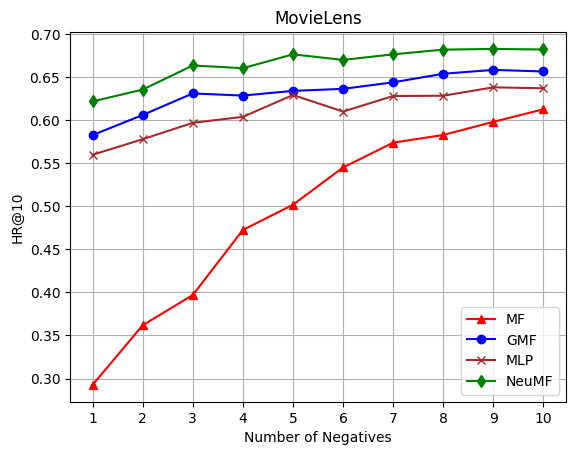

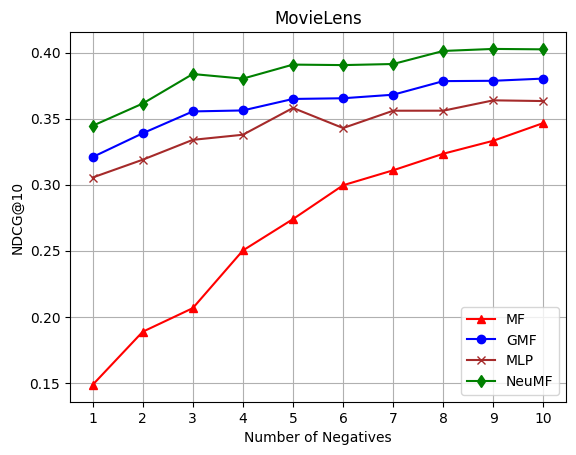

In [18]:
plt.figure("Negatives for ML with HR")
plt.plot(negatives, movieLensMF_HR_III, color= 'red', marker="^")
plt.plot(negatives, movieLensGMF_HR_III, color='blue', marker="o")
plt.plot(negatives, movieLensMLP_HR_III, color= 'brown', marker="x")
plt.plot(negatives, movieLensNeuMF_HR_III, color= 'green', marker="d")
plt.xlabel("Number of Negatives")
plt.ylabel("HR@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("MovieLens")
plt.xticks(negatives)
plt.grid()
plt.savefig("MF_HR_negatives.png")

plt.figure("Negatives for ML with NDCG")
plt.plot(negatives, movieLensMF_NDCG_III, color= 'red', marker="^")
plt.plot(negatives, movieLensGMF_NDCG_III, color='blue', marker="o")
plt.plot(negatives, movieLensMLP_NDCG_III, color= 'brown', marker="x")
plt.plot(negatives, movieLensNeuMF_NDCG_III, color= 'green', marker="d")
plt.xlabel("Number of Negatives")
plt.ylabel("NDCG@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("MovieLens")
plt.xticks(negatives)
plt.grid()
plt.savefig("MF_NDCG_negatives.png")

plt.show()

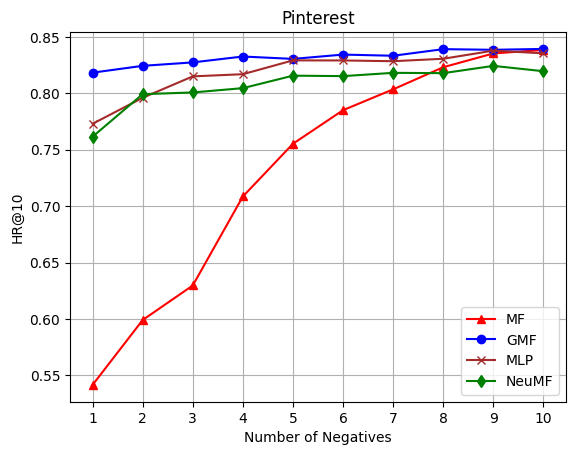

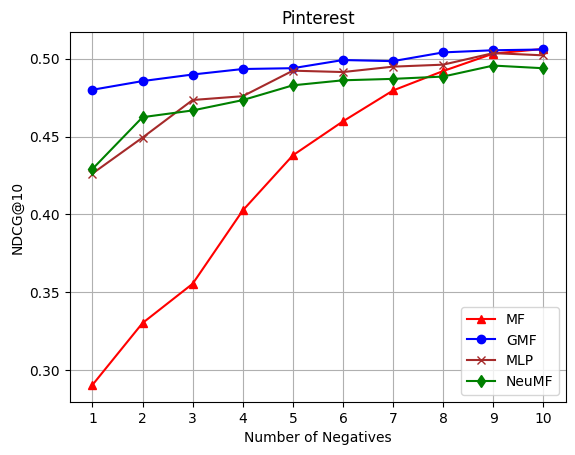

In [19]:
plt.figure("Negatives for ML with HR")
plt.plot(negatives, pinterestMF_HR_III, color= 'red', marker="^")
plt.plot(negatives, pinterestGMF_HR_III, color='blue', marker="o")
plt.plot(negatives, pinterestMLP_HR_III, color= 'brown', marker="x")
plt.plot(negatives, pinterestNeuMF_HR_III, color= 'green', marker="d")
plt.xlabel("Number of Negatives")
plt.ylabel("HR@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("Pinterest")
plt.xticks(negatives)
plt.grid()
plt.savefig("pin_HR_negatives.png")

plt.figure("Negatives for ML with NDCG")
plt.plot(negatives, pinterestMF_NDCG_III, color= 'red', marker="^")
plt.plot(negatives, pinterestGMF_NDCG_III, color='blue', marker="o")
plt.plot(negatives, pinterestMLP_NDCG_III, color= 'brown', marker="x")
plt.plot(negatives, pinterestNeuMF_NDCG_III, color= 'green', marker="d")
plt.xlabel("Number of Negatives")
plt.ylabel("NDCG@10")
plt.legend(("MF","GMF","MLP","NeuMF",))
plt.title("Pinterest")
plt.xticks(negatives)
plt.grid()
plt.savefig("pin_NDCG_negatives.png")

plt.show()